# 1. Description

## 1.1. About Dataset

This dataset was collected as part of a comprehensive survey aimed at understanding the factors contributing to depression risk among adults. It was collected during an anonymous survey conducted between January and June 2023. 

The survey was conducted across various cities, targeting individuals from diverse backgrounds and professions. Participants, ranging from 18 to 60 years old, voluntarily provided inputs on factors such as age, gender, city, degree, job satisfaction, study satisfaction, study/work hours, and family history among others. Participants were asked to provide inputs without requiring any professional mental health assessments or diagnostic test scores.

The target variable, 'Depression', represents whether the individual is at risk of depression, marked as 'Yes' or 'No', based on their responses to lifestyle and demographic factors.

## 1.2. Project Overview

This project focuses on providing insights into how everyday factors might correlate with mental health risks. It also employs machine learning techniques and the Python programming language in order to create predictive model in mental health research, particularly in identifying key contributors to mental health challenges in a non-clinical setting. 

Techniques:

Research Objectives:
- Provide an accurate prediction method: Leverage the CART algorithm with the Gini index and Pruning techniques to develop a high-accuracy model for predicting customer conversion behavior.
- Ensure ease of implementation and high applicability: The prediction method is designed for practical application, delivering tangible value for businesses in the digital marketing domain.
- Lay the foundation for effective and sustainable digital marketing strategies: Offer a basis for developing digital marketing strategies that enhance efficiency and sustainability in the long term.
Key Components:
- Initializing a decision tree model.
- Tuning the model using Cost Complexity Pruning.
- Tuning the model with Pre-Pruning techniques.
- Addressing class imbalance issues by employing the Balanced Bagging Classifier.
- Using performance metrics such as AUC-ROC, confusion matrices, and model summaries to evaluate model accuracy and effectiveness.

# 2. Import Libraries

In [ ]:
import sys
!{sys.executable} -m pip install imbalanced-learn

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
import joblib

# 3. Preprocessing

In [236]:
df_train = pd.read_csv(r"C:\Users\PC\Downloads\mental health data\train.csv")

In [237]:
df_train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [238]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [4]:
df_train.duplicated().sum()

0

In [204]:
def get_categorical_numerical_features(df):
    # Get Numeric & Categorical Features
    numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
    return numeric_features, categorical_features
numeric_features, categorical_features = get_categorical_numerical_features(df_train)
print(numeric_features)
print(categorical_features)

['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']
['Name', 'Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


In [7]:
df_train.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [8]:
df_train["Sleep Duration"].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [ ]:
def transform_sleep_duration(value):
    value_list = list(map(int, re.findall(r'\d+', value)))  

    if len(value_list) == 1:  
        if value_list[0] > 20:
            return value_list[0]/7
        else:
            return value_list[0]
    elif len(value_list) == 2:  
        start, end = value_list[:2]  

        if any in value_list > 20:
            if sum(value_list)/14 > 12:
                return None
            else:
                return sum(value_list)/14
        elif start < end:  
            return (start + end) / 2  
        else:  
            sleep_hours = (24 - start) + end 
            return sleep_hours if sleep_hours <= 12 else sleep_hours - 12  

    return None 

In [ ]:
def preprocessing(df):
    df.drop(columns=['Name', 'id', 'City', 'Degree', 'Profession'], inplace=True)

    # Encode 'Working Professional or Student': Working Professional → 1, Student → 0
    df['Working Professional or Student'] = df['Working Professional or Student'].map({'Working Professional': 1, 'Student': 0})

    # Fill missing values with mode
    df['Financial Stress'] = df['Financial Stress'].fillna(
                df['Financial Stress'].mode().iloc[0])
    
    # Encode 'Gender': Male → 1, Female → 0
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

    # Encode 'Dietary Habits': Healthy → 1, Unhealthy → 0
    df['Dietary Habits'] = df['Dietary Habits'].map({
                'More Healty': 4,
                'Healthy': 3,
                'Moderate': 2,
                'Less Healthy': 1,
                'Less than Healthy': 1,
                'Unhealthy': 0,
                'No Healthy': 0,
            })

    # Fill missing values with mode
    df['Dietary Habits'] = df['Dietary Habits'].fillna(
                    df['Dietary Habits'].mode().iloc[0])
    
    # Encode 'Have you ever had suicidal thoughts ?': Yes → 1, No → 0
    df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})

    # Encode 'Family History of Mental Illness': Yes → 1, No → 0
    df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})

    # Fill missing values with -1 (respodants who are not students or working professionals)
    df['Academic Pressure'] = df['Academic Pressure'].fillna('-1').astype(int)
    df['Work Pressure'] = df['Work Pressure'].fillna('-1').astype(int)
    df['CGPA'] = df['CGPA'].fillna('-1').astype(int)
    df['Study Satisfaction'] = df['Study Satisfaction'].fillna('-1').astype(int)
    df['Job Satisfaction'] = df['Job Satisfaction'].fillna('-1').astype(int)

    # Transform 'Sleep Duration'
    df['Sleep Duration'] = df['Sleep Duration'].apply(transform_sleep_duration)
    df.loc[df['Sleep Duration'] > 20, 'Sleep Duration'] = df['Sleep Duration'] / 7
    # Fill missing values with median
    df['Sleep Duration'] = df['Sleep Duration'].fillna(df['Sleep Duration'].median())

    return df

In [229]:
train = preprocessing(df_train)  
# Drop outliers
train_numeric = train.select_dtypes(include=[np.number])
z_scores = np.abs((train_numeric - train_numeric.mean()) / train_numeric.std(ddof=0))
outliers = train[(z_scores > 3).any(axis=1)]
train =  train[(z_scores <= 3).all(axis=1)]

Before SMOTE: Counter({0: 112793, 1: 23475})
After SMOTE: Counter({0: 112793, 1: 112793})


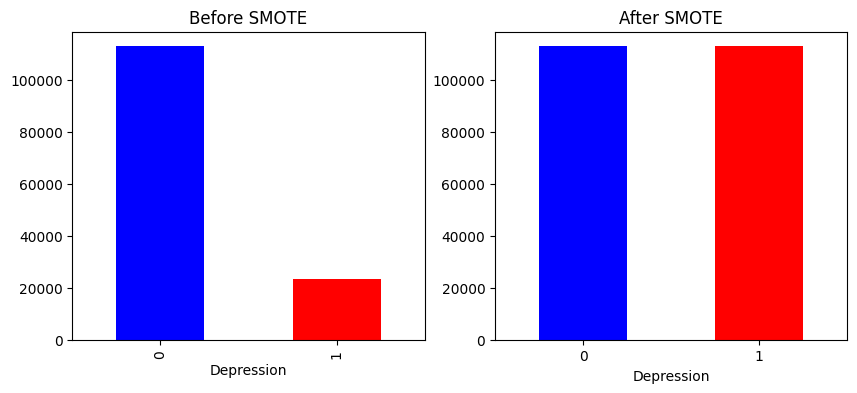

In [230]:
# Check the initial rate
print("Before SMOTE:", Counter(train['Depression']))

# Split independent variables (X) and target (y)
X = train.drop(columns=['Depression'])
y = train['Depression']

# Apply SMOTE
rus = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Check the rate after SMOTE
print("After SMOTE:", Counter(y_resampled))

# Transform the result into DataFrame
train_resampled = pd.DataFrame(X_resampled, columns=X.columns)
train_resampled['Depression'] = y_resampled

# Visualize to compare Before and After
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
train['Depression'].value_counts().plot(kind='bar', color=['blue', 'red'], ax=axes[0], title="Before SMOTE")
train_resampled['Depression'].value_counts().plot(kind='bar', color=['blue', 'red'], ax=axes[1], title="After SMOTE")
plt.xticks(rotation=0)
plt.show()

# 4. EDA

In [290]:
df = pd.read_csv(r"C:\Users\PC\Downloads\mental health data\train.csv")

## Univariate Analysis

In [241]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


## Multivariate analysis

### 1. Gender

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

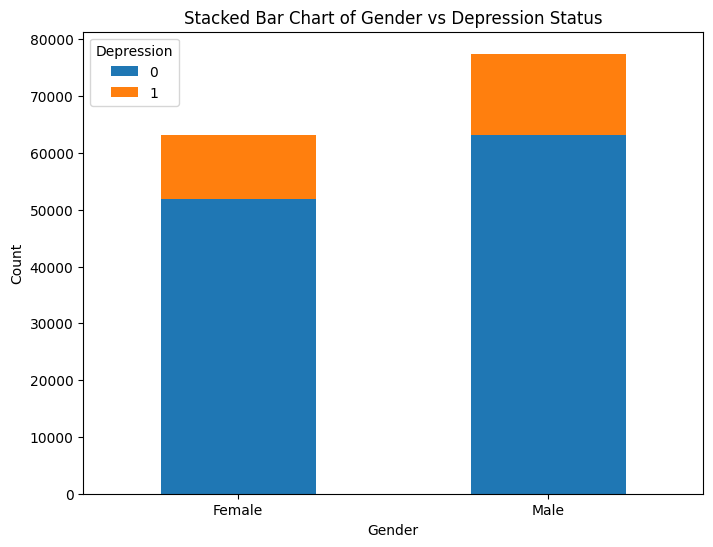

In [242]:
counts = df[['Gender', 'Depression']].value_counts().unstack()

counts.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.xlabel("Gender") 
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Gender vs Depression Status")
plt.legend(title="Depression")
plt.xticks(rotation=0) 

In [243]:
# Percentage of male respondents being depressed
percent_male_depressed = (df[(df['Gender'] == 'Male') & (df['Depression'] == 1)].shape[0]) / (df[df['Gender'] == 'Male'].shape[0]) * 100
print('% Male respondents being depressed:', round(percent_male_depressed, 2), '%')

# Percentage of female respondents being depressed
percent_female_depressed = (df[(df['Gender'] == 'Female') & (df['Depression'] == 1)].shape[0]) / (df[df['Gender'] == 'Female'].shape[0]) * 100
print('% Female respondents being depressed:', round(percent_female_depressed, 2), '%')

% Male respondents being depressed: 18.46 %
% Female respondents being depressed: 17.82 %


In [260]:
# Hypothesis Testing: Women Have a Higher Risk of Depression Than Men
# H0: There is no significant difference in depression rates between men and women.
# H1: There is a statistically significant difference in depression rates between men and women.

# Frequency Table
crosstab = pd.crosstab(df['Gender'], df['Depression'])

# 🔥 Chi-square statistic
chi2, p, dof, expected = stats.chi2_contingency(crosstab)

print("Frequency Table of Depression by Gender:")
print(crosstab)
print(f"\nChi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("✅ There is a statistically significant difference in depression rates between men and women.")
else:
    print("⚠ There is no significant difference in depression rates between the two genders.")

Frequency Table of Depression by Gender:
Depression      0      1
Gender                  
Female      51965  11271
Male        63168  14296

Chi-square statistic: 9.29
P-value: 0.0023
✅ There is a statistically significant difference in depression rates between men and women.


💡 **Key Insight**: Women have a slightly higher risk of depression than men.

### 2. Age

Text(0.5, 1.0, 'Stacked Histogram of Age Distribution by Depression Status')

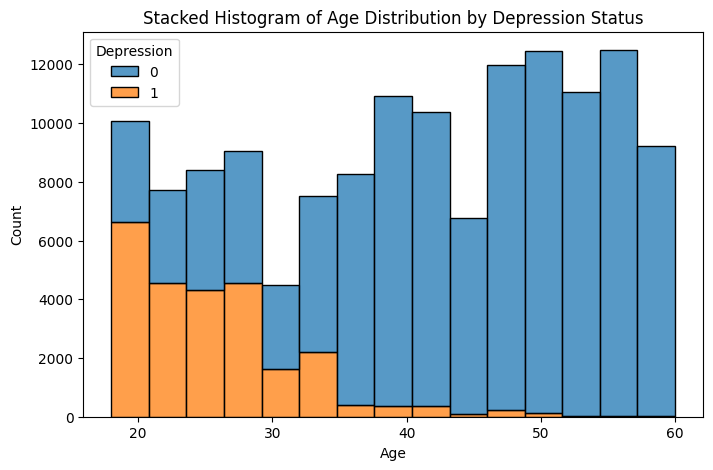

In [244]:
plt.figure(figsize=(8, 5))
sns.histplot(df, x="Age", hue="Depression", multiple="stack", bins=15)

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Stacked Histogram of Age Distribution by Depression Status")

In [261]:
spearman_corr, spearman_p = stats.spearmanr(df['Age'], df['Depression'])

print(f"Spearman Correlation Coefficient: {spearman_corr:.2f}")
print(f"P-value: {spearman_p:.4f}")

if spearman_p < 0.05:
    print("✅ There is a statistically significant relationship between age and the risk of depression.")
    if spearman_corr < 0:
        print("➡ Younger individuals have a higher risk of depression.")
    else:
        print("➡ Older individuals have a higher risk of depression.")
else:
    print("⚠ There is no significant relationship between age and the risk of depression.")

Spearman Correlation Coefficient: -0.54
P-value: 0.0000
✅ There is a statistically significant relationship between age and the risk of depression.
➡ Younger individuals have a higher risk of depression.


💡 **Key Insight**: Young people have a higher risk of depression.

💭 **Author's Hypothesis:**

1️. **Younger individuals have greater awareness of mental health issues**, while older age groups may not recognize their psychological struggles.  
   - With increased access to mental health education, younger generations are more likely to acknowledge and seek help for their mental health concerns.  
   - In contrast, older individuals may have grown up in an era where mental health awareness was limited, leading to underreporting or misinterpretation of their psychological symptoms.  

2️. **The underdeveloped brain may struggle to handle stress effectively.**  
   - Adolescents and young adults have not yet fully developed cognitive and emotional regulation mechanisms, making them more vulnerable to stress and mental health challenges.  
   - The prefrontal cortex, which is responsible for decision-making and emotional control, continues to mature well into early adulthood, potentially increasing susceptibility to depression.  

3️. **Potential sampling bias in data collection.**  
   - The dataset may not be fully representative of the general population.  
   - Certain groups may be overrepresented or underrepresented due to factors such as survey accessibility, willingness to participate, or cultural stigmas surrounding mental health discussions.

### 3. Working Professional or Student 

(array([0, 1]), [Text(0, 0, 'Student'), Text(1, 0, 'Working Professional')])

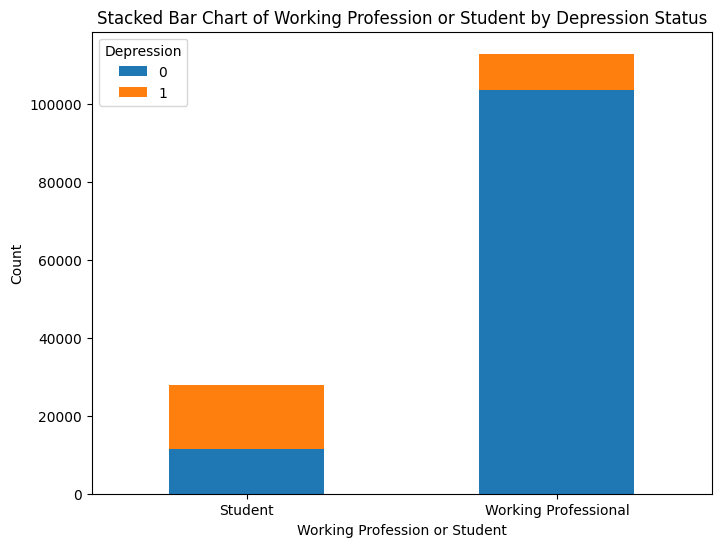

In [263]:
counts = df[['Working Professional or Student', 'Depression']].value_counts().unstack()

counts.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.xlabel("Working Profession or Student") 
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Working Profession or Student by Depression Status")
plt.legend(title="Depression")
plt.xticks(rotation=0) 

There is an imbalance between two groups.

### 4. Academic Pressure

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0')])

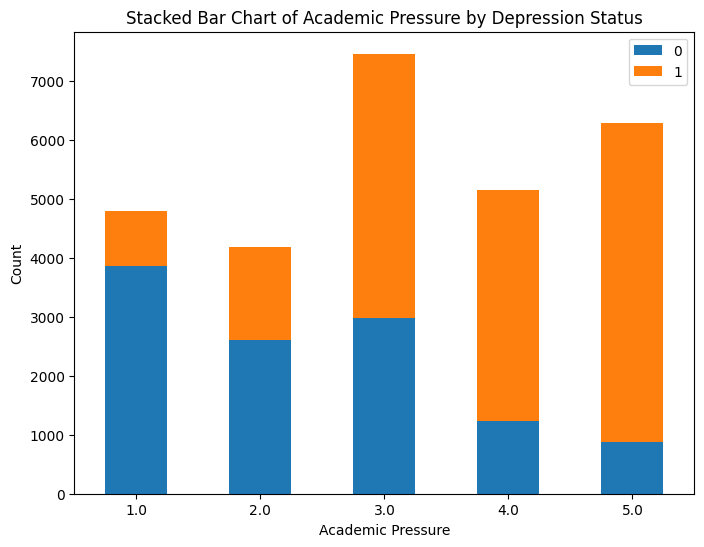

In [246]:
counts = df[['Academic Pressure', 'Depression']].value_counts().unstack()

counts.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.xlabel("Academic Pressure")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Academic Pressure by Depression Status")
plt.legend()
plt.xticks(rotation=0)

In [268]:
df_filtered = df[df['Academic Pressure'].notnull()] # Not include people who are not students

# Compute Spearman Correlation
spearman_corr, spearman_p = stats.spearmanr(df_filtered['Academic Pressure'], df_filtered['Depression'])

print(f"Spearman Correlation Coefficient: {spearman_corr:.2f}")
print(f"P-value: {spearman_p:.4f}")

if spearman_p < 0.05:
    print("✅ There is a statistically significant relationship between Academic Pressure and the risk of depression.")
    if spearman_corr > 0:
        print("➡ Individuals with higher Academic Pressure have a greater risk of depression.")
    else:
        print("➡ Individuals with higher Academic Pressure have a lower risk of depression.")
else:
    print("⚠ There is no significant relationship between Academic Pressure and depression.")

Spearman Correlation Coefficient: 0.47
P-value: 0.0000
✅ There is a statistically significant relationship between Academic Pressure and the risk of depression.
➡ Individuals with higher Academic Pressure have a greater risk of depression.


💡 **Key Insight**: The higher academic pressure, the greater risk of depression.

### 5. Work Pressure

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0')])

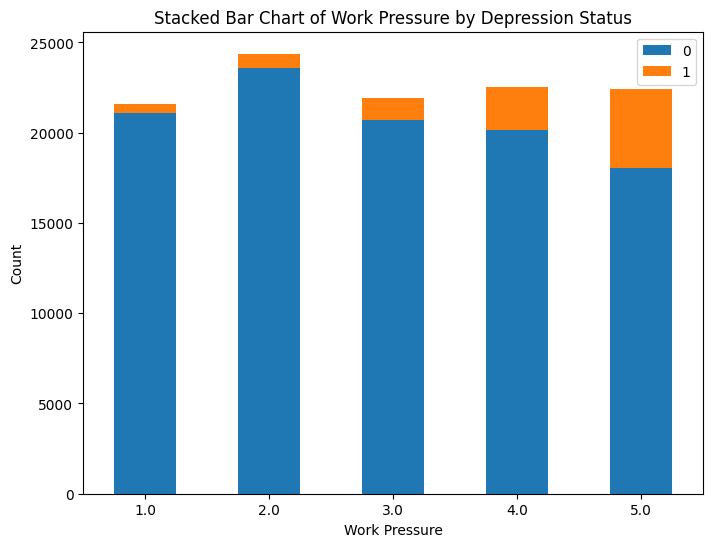

In [247]:
counts = df[['Work Pressure', 'Depression']].value_counts().unstack()

counts.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.xlabel("Work Pressure")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Work Pressure by Depression Status")
plt.legend()
plt.xticks(rotation=0)

In [269]:
df_filtered = df[df['Work Pressure'].notnull()] # Not include Student or people who don't work 

# Compute Spearman Correlation
spearman_corr, spearman_p = stats.spearmanr(df_filtered['Work Pressure'], df_filtered['Depression'])

print(f"Spearman Correlation Coefficient: {spearman_corr:.2f}")
print(f"P-value: {spearman_p:.4f}")

if spearman_p < 0.05:
    print("✅ There is a statistically significant relationship between Work Pressure and the risk of depression.")
    if spearman_corr > 0:
        print("➡ Individuals with higher Work Pressure have a greater risk of depression.")
    else:
        print("➡ Individuals with higher Work Pressure have a lower risk of depression.")
else:
    print("⚠ There is no significant relationship between Work Pressure and depression.")

Spearman Correlation Coefficient: 0.22
P-value: 0.0000
✅ There is a statistically significant relationship between Work Pressure and the risk of depression.
➡ Individuals with higher Work Pressure have a greater risk of depression.


💡 **Key Insight**: The higher work pressure, the greater risk of depression.

### 6. CGPA

Text(0, 0.5, 'Count')

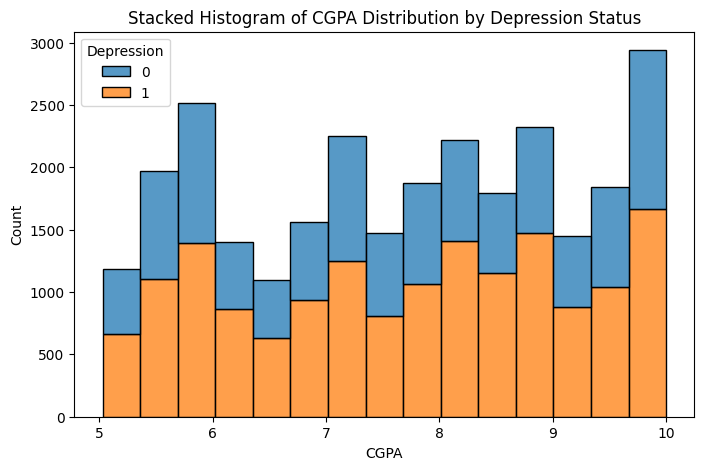

In [248]:
plt.figure(figsize=(8, 5))
sns.histplot(df, x="CGPA", hue="Depression", multiple="stack", bins=15)

plt.title("Stacked Histogram of CGPA Distribution by Depression Status")
plt.xlabel("CGPA")
plt.ylabel("Count")

In [278]:
df_filtered_CGPA = df[df.CGPA.notnull()] # Not include people who are not students
spearman_corr, spearman_p = stats.spearmanr(df_filtered_CGPA['CGPA'], df_filtered_CGPA['Depression'])

print(f"Spearman Correlation Coefficient: {spearman_corr:.2f}")
print(f"P-value: {spearman_p:.4f}")

if spearman_p < 0.05:
    print("✅ There is a statistically significant relationship between CGPA and the risk of depression.")
    if spearman_corr < 0:
        print("➡ Poor-performing students are at a higher risk of depression.")
    else:
        print("➡ Well-performing students are at a higher risk of depression.")
else:
    print("⚠ There is no significant relationship between CGPA and the risk of depression.")

Spearman Correlation Coefficient: 0.52
P-value: 0.0000
✅ There is a statistically significant relationship between CGPA and the risk of depression.
➡ Well-performing students are at a higher risk of depression.


💡 **Key insight:** Well-performing students are at a higher risk of depression.

💭 **Author's Hypothesis:**   
Individuals with high academic performance may be excessively concerned about their academic success, which in turn drives them to achieve high grades. Constant pressure to maintain top grades can result in mental and emotional exhaustion.

### 7. Study Satisfaction

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0')])

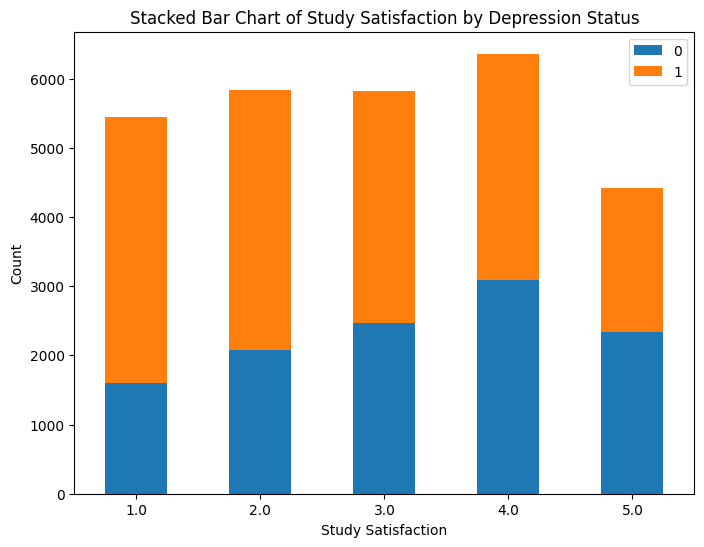

In [249]:
counts = df[['Study Satisfaction', 'Depression']].value_counts().unstack()

counts.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.xlabel("Study Satisfaction")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Study Satisfaction by Depression Status")
plt.legend()
plt.xticks(rotation=0)

In [280]:
df_filtered = df[df['Study Satisfaction'].notnull()]  # Filter out missing values

# Compute Spearman Correlation
spearman_corr, spearman_p = stats.spearmanr(df_filtered['Study Satisfaction'], df_filtered['Depression'])

print(f"Spearman Correlation Coefficient: {spearman_corr:.2f}")
print(f"P-value: {spearman_p:.4f}")

if spearman_p < 0.05:
    print("✅ There is a statistically significant relationship between Study Satisfaction and the risk of depression.")
    if spearman_corr > 0:  
        print("➡ Individuals with higher Study Satisfaction have a higher risk of depression.")
    else:  
        print("➡ Higher Study Satisfaction is associated with a lower risk of depression.")
else:
    print("⚠ There is no significant relationship between Study Satisfaction and depression.")

Spearman Correlation Coefficient: 0.50
P-value: 0.0000
✅ There is a statistically significant relationship between Study Satisfaction and the risk of depression.
➡ Individuals with higher Study Satisfaction have a higher risk of depression.


💡 **Key insight:** Students  with higher Study Satisfaction have a higher risk of depression.

💭 **Author's Hypothesis:**   
Individuals with well performance may be excessively concerned about their academic success, which in turn drives them to achieve high grades and be satisfied with their results. Constant pressure to maintain top grades can result in mental and emotional exhaustion.

### 8. Job Satisfaction

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0')])

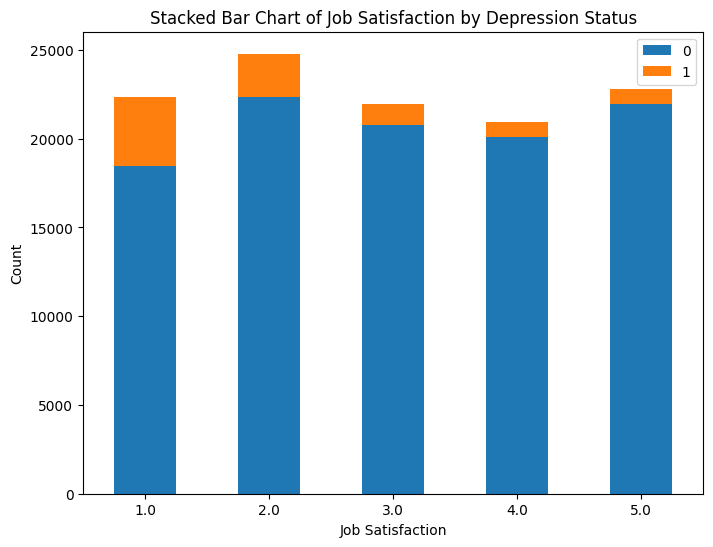

In [250]:
counts = df[['Job Satisfaction', 'Depression']].value_counts().unstack()

counts.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.xlabel("Job Satisfaction")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Job Satisfaction by Depression Status")
plt.legend()
plt.xticks(rotation=0)

In [281]:
df_filtered = df[df['Job Satisfaction'].notnull()]  # Filter out missing values

# Compute Spearman Correlation
spearman_corr, spearman_p = stats.spearmanr(df_filtered['Job Satisfaction'], df_filtered['Depression'])

print(f"Spearman Correlation Coefficient: {spearman_corr:.2f}")
print(f"P-value: {spearman_p:.4f}")

if spearman_p < 0.05:
    print("✅ There is a statistically significant relationship between Job Satisfaction and the risk of depression.")
    if spearman_corr > 0:  
        print("➡ Individuals with higher Job Satisfaction have a higher risk of depression.")
    else:  
        print("➡ Higher Job Satisfaction is associated with a lower risk of depression.")
else:
    print("⚠ There is no significant relationship between Job Satisfaction and depression.")

Spearman Correlation Coefficient: -0.44
P-value: 0.0000
✅ There is a statistically significant relationship between Job Satisfaction and the risk of depression.
➡ Higher Job Satisfaction is associated with a lower risk of depression.


💡 **Key Insight**: Higher Job Satisfaction is associated with a lower risk of depression.

 ### 9. Dietary Habits    

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 [Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000'),
  Text(20000.0, 0, '20000'),
  Text(30000.0, 0, '30000'),
  Text(40000.0, 0, '40000'),
  Text(50000.0, 0, '50000'),
  Text(60000.0, 0, '60000')])

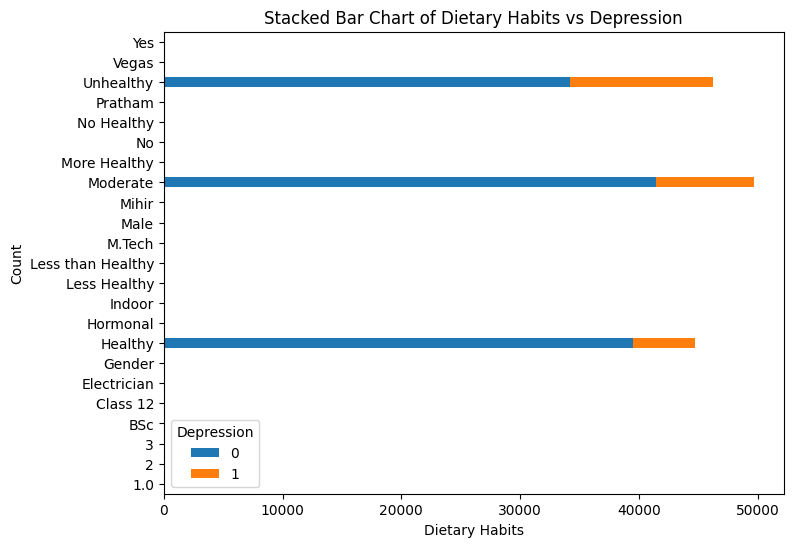

In [251]:
counts = df[['Dietary Habits', 'Depression']].value_counts().unstack()

counts.plot(kind='barh', stacked=True, figsize=(8, 6))

plt.xlabel("Dietary Habits") 
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Dietary Habits vs Depression")
plt.legend(title="Depression")
plt.xticks(rotation=0) 

### 10. Have you ever had suicidal thoughts ?

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

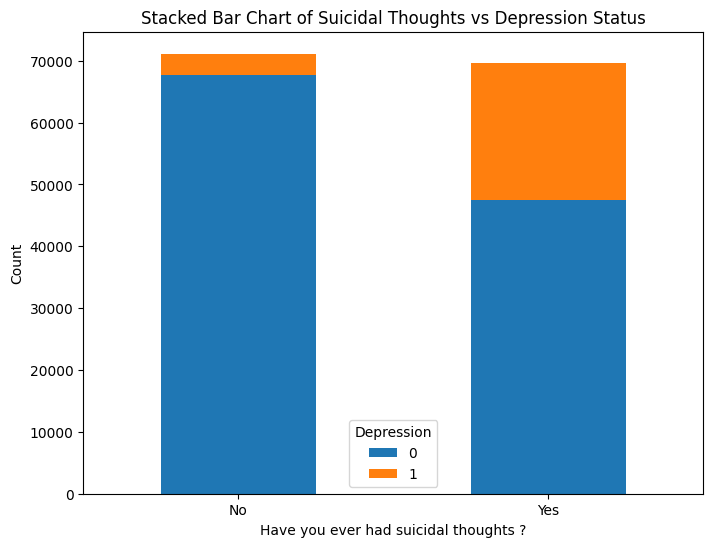

In [252]:
counts = df[['Have you ever had suicidal thoughts ?', 'Depression']].value_counts().unstack()

counts.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.xlabel("Have you ever had suicidal thoughts ?") 
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Suicidal Thoughts vs Depression Status")
plt.legend(title="Depression")
plt.xticks(rotation=0) 

💡 **Key insight:**   
Not all people who have ever had suicidal thoughts are depressed but the data shows a clear association between suicidal thoughts and depression status. Individuals who have experienced suicidal thoughts are much more likely to have depression compared to those who have not. This suggests a strong relationship between suicidal ideation and depression, reinforcing the importance of mental health support for those expressing such thoughts.

### 11. Work/Study Hours                                        

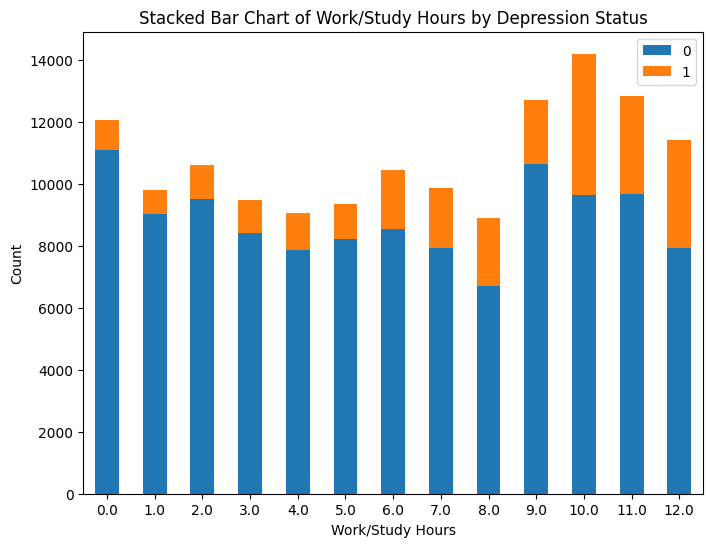

In [253]:
counts = df[['Work/Study Hours', 'Depression']].value_counts().unstack()

counts.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.xlabel("Work/Study Hours")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Work/Study Hours by Depression Status")
plt.legend()
plt.xticks(rotation=0)

# Hiển thị biểu đồ
plt.show()

In [296]:
from scipy.stats import spearmanr

spearman_corr, spearman_p = spearmanr(df['Work/Study Hours'], df['Depression'])

print(f"Spearman Correlation Coefficient: {spearman_corr:.2f}")
print(f"P-value: {spearman_p:.4f}")

if spearman_p < 0.05:
    print("✅ There is a statistically significant relationship between Work/Study Hours and the risk of depression.")
    if spearman_corr > 0:
        print("➡ Individuals with more Work/Study Hours have a higher risk of depression.")
    else:
        print("➡ Individuals with fewer Work/Study Hours have a higher risk of depression.")  
else:
    print("⚠ There is no significant relationship between Work/Study Hours and depression.")

Spearman Correlation Coefficient: 0.19
P-value: 0.0000
✅ There is a statistically significant relationship between Work/Study Hours and the risk of depression.
➡ Individuals with more Work/Study Hours have a higher risk of depression.


💡 **Key insight:** Individuals with more Work/Study Hours have a higher risk of depression.

💭 **Author's Hypothesis:**

- Long hours of work or study can lead to chronic stress, exhaustion, and burnout, increasing vulnerability to depression.
- Individuals who dedicate excessive time to work or study often sacrifice personal time, hobbies, and social interactions, leading to loneliness and decreased well-being.

###  12. Financial Stress                   

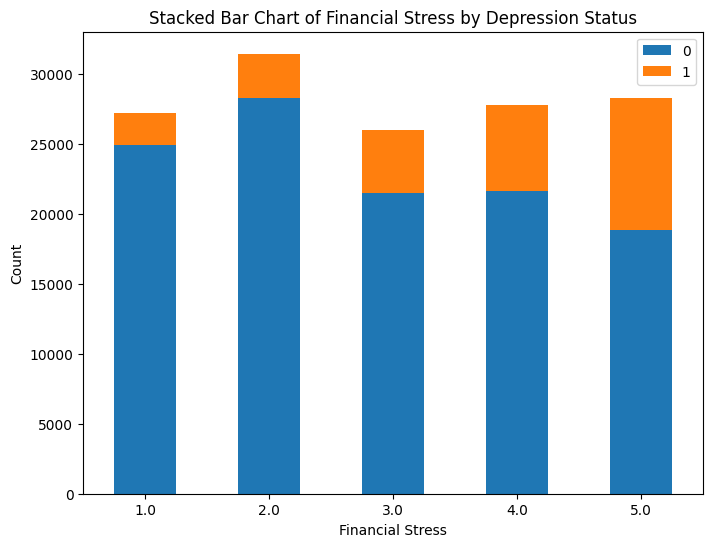

In [254]:
counts = df[['Financial Stress', 'Depression']].value_counts().unstack()

counts.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.xlabel("Financial Stress")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Financial Stress by Depression Status")
plt.legend()
plt.xticks(rotation=0)

# Hiển thị biểu đồ
plt.show()

In [300]:
df_filtered = df[df['Financial Stress'].notnull()] # Filter out missing values
# Compute Spearman Correlation
spearman_corr, spearman_p = stats.spearmanr(df_filtered['Financial Stress'], df_filtered['Depression'])

print(f"Spearman Correlation Coefficient: {spearman_corr:.2f}")
print(f"P-value: {spearman_p:.4f}")

if spearman_p < 0.05:
    print("✅ There is a statistically significant relationship between Financial Stress and the risk of depression.")
    if spearman_corr > 0:
        print("➡ Individuals with higher Financial Stress have a greater risk of depression.")
    else:
        print("➡ Individuals with higher Financial Stress have a lower risk of depression.")
else:
    print("⚠ There is no significant relationship between Financial Stress and depression.")

Spearman Correlation Coefficient: 0.23
P-value: 0.0000
✅ There is a statistically significant relationship between Financial Stress and the risk of depression.
➡ Individuals with higher Financial Stress have a greater risk of depression.


💡 **Key insight:** Individuals with higher Financial Stress have a greater risk of depression.

### 13. Family History of Mental Illness         

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

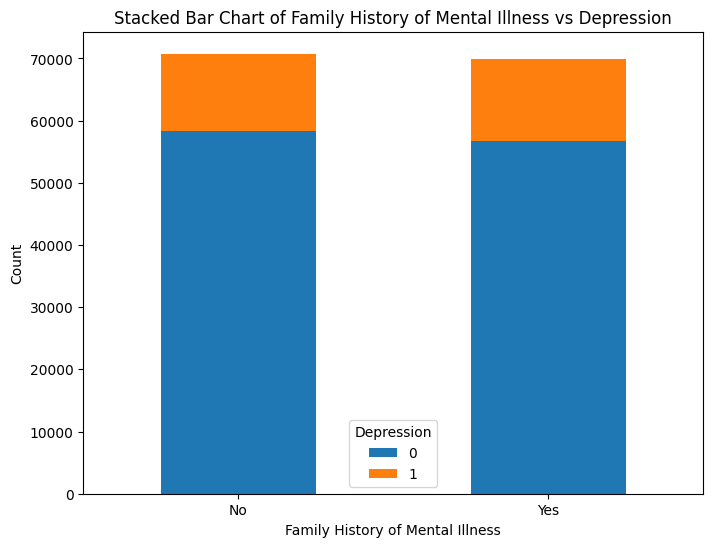

In [255]:
counts = df[['Family History of Mental Illness', 'Depression']].value_counts().unstack()

counts.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.xlabel("Family History of Mental Illness") 
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Family History of Mental Illness vs Depression")
plt.legend(title="Depression")
plt.xticks(rotation=0) 

In [302]:
# Hypothesis Testing: People with Family History of Mental Illness have a Higher Risk of Depression.
# H0: There is no significant difference in depression rates between 2 groups.
# H1: There is a statistically significant difference in depression rates between 2 groups.

# Frequency Table
crosstab = pd.crosstab(df['Family History of Mental Illness'], df['Depression'])

# 🔥 Chi-square statistic
chi2, p, dof, expected = stats.chi2_contingency(crosstab)

print("Frequency Table of Depression by Family History of Mental Illness:")
print(crosstab)
print(f"\nChi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("✅ There is a statistically significant difference in depression rates between two groups.")
else:
    print("⚠ There is no significant difference in depression rates between the two groups.")

Frequency Table of Depression by Family History of Mental Illness:
Depression                            0      1
Family History of Mental Illness              
No                                58348  12410
Yes                               56785  13157

Chi-square statistic: 38.23
P-value: 0.0000
✅ There is a statistically significant difference in depression rates between two groups.


In [304]:
# Percentage of respondents with Family History of Mental Illness
with_history = (df[(df['Family History of Mental Illness'] == 'Yes') & (df['Depression'] == 1)].shape[0]) / (df[df['Family History of Mental Illness'] == 'Yes'].shape[0]) * 100
print('% Respondents with Family History of Mental Illness:', round(with_history, 2), '%')

# Percentage of respondents without Family History of Mental Illness
without_history = (df[(df['Family History of Mental Illness'] == 'No') & (df['Depression'] == 1)].shape[0]) / (df[df['Family History of Mental Illness'] == 'No'].shape[0]) * 100
print('% Respondents without Family History of Mental Illness:', round(without_history, 2), '%')

% Respondents with Family History of Mental Illness: 18.81 %
% Respondents without Family History of Mental Illness: 17.54 %


💡 **Key insight:** Inviduals that have family history of mental health problem have higher risk of depression.

### 14. Sleep Duration 

In [291]:
df['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [292]:
df['Sleep Duration'] = df['Sleep Duration'].apply(transform_sleep_duration).round(1)
df.loc[df['Sleep Duration'] > 20, 'Sleep Duration'] = (df['Sleep Duration'] / 7).round(1)
# Fill missing values with median 
df['Sleep Duration'] = df['Sleep Duration'].fillna(df['Sleep Duration'].median())

In [294]:
df['Sleep Duration'].unique()

array([ 8. ,  5. ,  5.5,  7.5,  1.5,  7. ,  6.5, 10.5,  8.5,  6.1, 10. ,
        2.5,  3.5,  8.6,  4.5,  9. ,  2. ,  6.4,  5.1,  6.6])

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000.]),
 [Text(0.0, 0, '0'),
  Text(5000.0, 0, '5000'),
  Text(10000.0, 0, '10000'),
  Text(15000.0, 0, '15000'),
  Text(20000.0, 0, '20000'),
  Text(25000.0, 0, '25000'),
  Text(30000.0, 0, '30000'),
  Text(35000.0, 0, '35000'),
  Text(40000.0, 0, '40000'),
  Text(45000.0, 0, '45000')])

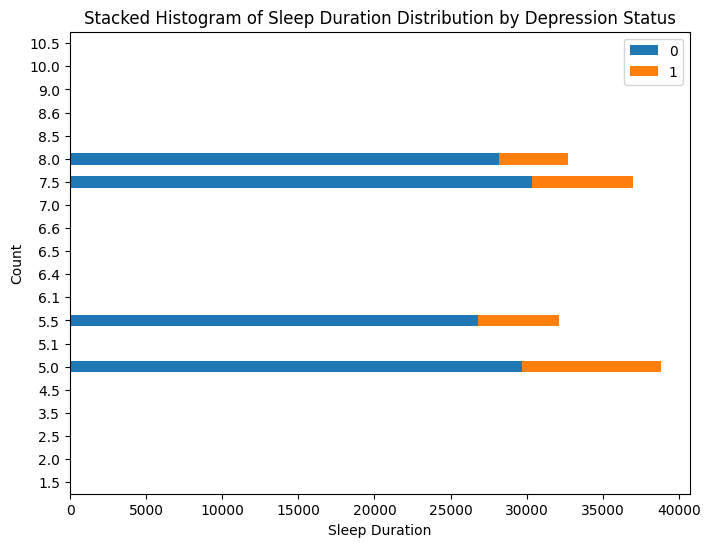

In [293]:
counts = df[['Sleep Duration', 'Depression']].value_counts().unstack()

counts.plot(kind='barh',stacked=True, figsize=(8, 6))

plt.xlabel("Sleep Duration")
plt.ylabel("Count")
plt.title("Stacked Histogram of Sleep Duration Distribution by Depression Status")
plt.legend()
plt.xticks(rotation=0)

In [301]:
spearman_corr, spearman_p = spearmanr(df['Sleep Duration'], df['Depression'])

print(f"Spearman Correlation Coefficient: {spearman_corr:.2f}")
print(f"P-value: {spearman_p:.4f}")

if spearman_p < 0.05:
    print("✅ There is a statistically significant relationship between Sleep Duration and the risk of depression.")
    if spearman_corr > 0:
        print("➡ Individuals with longer sleep duration have a higher risk of depression.")
    else:
        print("➡ Individuals with shorter sleep duration have a higher risk of depression.")  
else:
    print("⚠ There is no significant relationship between Sleep Duration and depression.")

Spearman Correlation Coefficient: -0.00
P-value: 0.1552
⚠ There is no significant relationship between Sleep Duration and depression.


### 15. Other variables

In [295]:
df = pd.read_csv(r"C:\Users\PC\Downloads\mental health data\train.csv")
print(df.City.unique())
print(df.Profession.unique())
print(df.Degree.unique())

['Ludhiana' 'Varanasi' 'Visakhapatnam' 'Mumbai' 'Kanpur' 'Ahmedabad'
 'Thane' 'Nashik' 'Bangalore' 'Patna' 'Rajkot' 'Jaipur' 'Pune' 'Lucknow'
 'Meerut' 'Agra' 'Surat' 'Faridabad' 'Hyderabad' 'Srinagar' 'Ghaziabad'
 'Kolkata' 'Chennai' 'Kalyan' 'Nagpur' 'Vadodara' 'Vasai-Virar' 'Delhi'
 'Bhopal' 'Indore' 'Ishanabad' 'Vidhi' 'Ayush' 'Gurgaon' 'Krishna'
 'Aishwarya' 'Keshav' 'Harsha' 'Nalini' 'Aditya' 'Malyansh' 'Raghavendra'
 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'Nandini' 'M.Com' 'Plata'
 'Atharv' 'Pratyush' 'City' '3.0' 'Less than 5 Kalyan' 'MCA' 'Mira'
 'Moreadhyay' 'Morena' 'Ishkarsh' 'Kashk' 'Mihir' 'Vidya' 'Tolkata' 'Anvi'
 'Krinda' 'Ayansh' 'Shrey' 'Ivaan' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kashish' 'Kibara' 'Vaishnavi' 'Chhavi' 'Parth' 'Mahi' 'Tushar' 'MSc'
 'No' 'Rashi' 'ME' 'Molkata' 'Researcher' 'Kagan' 'Armaan' 'Ithal'
 'Nalyan' 'Dhruv' 'Galesabad' 'Itheg' 'Aaradhya' 'Pooja' 'Khushi'
 'Khaziabad' 'Jhanvi' 'Unirar']
['Chef' 'Teacher' nan 'Business Analyst' 'Finanancial An

Since the City variable contains a large number of unique values, meaningful insights cannot be derived from visualizations unless it is categorized into relevant groups based on specific characteristics or criteria (e.g., Tier 1/2/3 cities, capital cities, economic hubs, tourist destinations, etc.).

Similarly, for the Profession and Degree variables, grouping them into distinct categories based on key industry sectors would enhance interpretability and analysis.

### 16. Correlation

Text(0.5, 1.0, 'Correlation Heatmap')

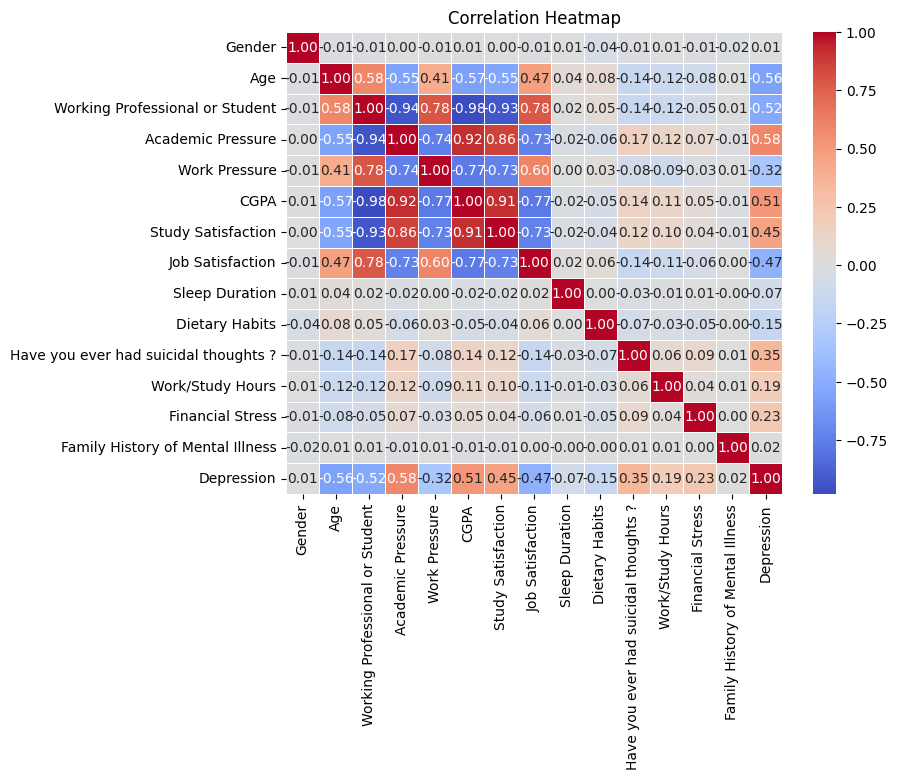

In [277]:
df = pd.read_csv(r"C:\Users\PC\Downloads\mental health data\train.csv")
train = preprocessing(df)
numeric_features = train.select_dtypes(include=['number'])

# Correlation matrix matrix
corr = numeric_features.corr()  

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")

There is an inconsistency in Correlation Result and Statistical Test. The correlation result may be misleading due to noise, as the dataset includes individuals without Work Pressure (Work Pressure values = -1).  
This leads to an incorrect conclusion: Higher Work Pressure leads to Lower depression risk, while statistical tests indicate the opposite relationship.

📌 Decision to Drop Certain Variables as inputs for predictive model:  
1. Working Professional or Student:  
This variable strongly correlates with Age, CGPA, Academic Pressure, Work Pressure, Job Satisfation, Study Satisfation. 
Besides, it can be inferred from those variables, the author thinks it should be removed.  
2. Sleep Duration:  
Statistical analysis shows no significant impact on the target variable (Depression).
Removing it simplifies the model without losing predictive power.

💡 **Key insight:** There is positive correlation between CGPA, Academic Pressure, and Study Satisfaction.
- Students who prioritize academic performance tend to achieve higher GPAs.
- They also report greater satisfaction with their studies.

This aligns with the idea that high-achieving students often set clear academic goals, leading to both higher performance and a sense of fulfillment in their education.

# 5. Build model

In [305]:
# Target variable is the Depression column
X = train_resampled.drop(columns=['Depression', 'Working Professional or Student', 'Sleep Duration'])
y = train_resampled['Depression']

# Split into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [307]:
xgb_model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_val)

# Save the model for future use.
# joblib.dump(xgb_model, "xgb_model.pkl")
# xgb_model_loaded = joblib.load("model.pkl")

print("Accuracy:", accuracy_score(y_val, y_pred))
recall = recall_score(y_val, y_pred)
print("Recall:", recall)

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [15:50:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9492442040870606
Recall: 0.9550551837241257


In [ ]:
lgbm_model = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.05)
lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
recall = recall_score(y_val, y_pred)
print("Recall:", recall)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 90232, number of negative: 90236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1059
[LightGBM] [Info] Number of data points in the train set: 180468, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
Accuracy: 0.953743516999867
Recall: 0.9572270732680289


In [309]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
recall = recall_score(y_val, y_pred)
print("Recall:", recall)

Accuracy: 0.9563145529500421
Recall: 0.9657373343380169


## Hyperparameter tuning

In [311]:
# Định nghĩa không gian siêu tham số cần tìm
param_grid = {
    'n_estimators': [50, 100, 200],      # Số lượng cây
    'max_depth': [3, 6, 9],          # Độ sâu cây
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # Tốc độ học
    'subsample': [0.7, 1],           # Tỷ lệ dữ liệu huấn luyện
    'colsample_bytree': [0.7, 1],    # Tỷ lệ feature sử dụng
}

# GridSearchCV
grid_search_xgb = GridSearchCV(xgb_model, param_grid, cv=5, scoring='recall', verbose=1, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# In kết quả tốt nhất
print("Best parameters:", grid_search_xgb.best_params_)
print("Best recall-score:", grid_search_xgb.best_score_)

# Dự đoán và đánh giá trên tập kiểm tra
best_model_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_val)
acc_xgb = accuracy_score(y_val, y_pred_xgb)
print(f"Validation accuracy: {acc_xgb}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [15:59:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200, 'subsample': 1}
Best recall-score: 0.9614438516995296
Validation accuracy: 0.9579768606764484


In [312]:
# Định nghĩa không gian siêu tham số cần tìm
param_grid_lgb = {
    'n_estimators': [50, 100, 200],     
    'max_depth': [3, 6, 9],         
    'learning_rate': [0.01, 0.05, 0.1, 0.2], 
    'subsample': [0.7, 1],          
    'colsample_bytree': [0.7, 1],   
}

# GridSearchCV
grid_search_lgbm = GridSearchCV(lgbm_model, param_grid_lgb, cv=5, scoring='recall', verbose=1, n_jobs=-1)
grid_search_lgbm.fit(X_train, y_train)

# In kết quả tốt nhất
print("Best parameters:", grid_search_lgbm.best_params_)
print("Best recall-score:", grid_search_lgbm.best_score_)

# Dự đoán và đánh giá trên tập kiểm tra
best_model_lgbm = grid_search_lgbm.best_estimator_
y_pred_lgbm = best_model_lgbm.predict(X_val)
acc_lgbm = accuracy_score(y_val, y_pred_lgbm)
print(f"Validation accuracy: {acc_lgbm}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 90232, number of negative: 90236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1059
[LightGBM] [Info] Number of data points in the train set: 180468, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.7}
Best recall-score: 0.9614881889943175
Validation accuracy: 0.9590407376213484


In [313]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,  # K-Fold Cross Validation
    scoring='accuracy',  
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))

Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9564253734651359
Recall: 0.9657816586144231


# 6. Submission

In [317]:
df_test = pd.read_csv(r"C:\Users\PC\Downloads\mental health data\test.csv")
id = df_test['id']

df_test_data = preprocessing(df_test)
df_test_data = df_test_data.drop(columns=['Working Professional or Student', 'Sleep Duration'])
# sử dụng model XGB với các thông số đã hiệu chỉnh
final_y_pred_xgb = best_rf.predict(df_test_data)


dic = {'id': id.values,
       'Depression': final_y_pred_xgb}

submission = pd.DataFrame(dic)
submission.head()


submission['Depression'] = submission['Depression']
submission.head()

submission.to_csv(r"C:\Users\PC\Downloads\submission.csv", index=False)

In [318]:
df = submission
df.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0


The author's initial choice of model was driven by Kaggle's evaluation criteria, which prioritize accuracy when ranking submissions. As a result, the model with the highest accuracy was selected, achieving **93% accuracy on the test set (private score)**.  

However, when considering the **real-world objective** of the predictive model—**identifying individuals at risk of depression**—accuracy alone is not the most suitable metric.  

In an imbalanced dataset, where the majority of individuals do not have depression, a model that predicts "no depression" most of the time can still achieve high accuracy but fail to detect those actually at risk. This means a high-accuracy model may not be effective in identifying at-risk individuals, as it overlooks true positive cases (false negatives).  

Therefore, in addition to **accuracy**, the author also considered **recall** as a key evaluation metric.  

- **Recall** measures the model’s ability to **correctly identify all cases of depression.**  
- In real-world health applications, missing a case of depression (false negatives) is far more critical than a false alarm (false positives).  
- A model with higher recall ensures that fewer depressed individuals go undetected, making it more **clinically valuable** and **aligned with the goal of early intervention.**  

By prioritizing both accuracy and recall, the author aims to build a model that is not only **competitive in Kaggle's ranking system** but also **practically useful for real-world mental health screening.**  